In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
# import geopandas as gpd
plt.style.use("ggplot")  #using style ggplot
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 1000)
from datetime import date
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
df = pd.read_csv('TSLA_5_Year.csv')

In [3]:
df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume
938,2020-09-24,363.799988,399.500000,351.299988,387.790009,387.790009,96561100
793,2020-02-28,125.940002,138.104004,122.304001,133.598007,133.598007,121114500
1062,2021-03-24,667.909973,668.020020,630.109985,630.270020,630.270020,33795200
603,2019-05-29,37.419998,38.478001,37.007999,37.972000,37.972000,59843000
141,2017-07-26,68.071999,69.099998,67.624001,68.769997,68.769997,24104000
991,2020-12-09,653.690002,654.320007,588.000000,604.479980,604.479980,71291200
1192,2021-09-28,787.200012,795.640015,766.179993,777.559998,777.559998,25381400
1277,2022-01-28,831.559998,857.500000,792.010010,846.349976,846.349976,44929700
556,2019-03-21,54.520000,55.290001,53.689999,54.804001,54.804001,29735500
367,2018-06-19,73.031998,74.000000,69.250000,70.510002,70.510002,63809500


In [4]:
df.shape

(1342, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1342 non-null   object 
 1   Open       1342 non-null   float64
 2   High       1342 non-null   float64
 3   Low        1342 non-null   float64
 4   Close      1342 non-null   float64
 5   Adj Close  1342 non-null   float64
 6   Volume     1342 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 73.5+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1.342000e+03
mean,293.747042,300.376309,286.584130,293.741256,293.741256,4.356359e+07
std,335.777594,343.486244,327.156431,335.482524,335.482524,2.961138e+07
min,36.220001,37.335999,35.397999,35.793999,35.793999,9.800600e+06
25%,60.400002,61.492501,59.260998,60.509000,60.509000,2.458988e+07
50%,70.789002,71.868000,69.821999,70.665001,70.665001,3.430435e+07
75%,602.200012,616.739990,592.877502,604.824997,604.824997,5.072438e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df2 = df

In [9]:
#Conversion data type column -  date from object to Datetime

df2["Date"]=pd.to_datetime(df2["Date"])

In [10]:
# check unique value
df2.nunique().sort_values()

High         1290
Open         1294
Low          1305
Close        1323
Adj Close    1323
Volume       1337
Date         1342
dtype: int64

In [11]:
# check duplicated  value
df2.duplicated().sum()

0

In [12]:
# make 2 column - Year & Month 

df2["Year"]=df["Date"].dt.year
df2["Month"]=df["Date"].dt.month
df2["Day"]=df["Date"].dt.day

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1342 non-null   datetime64[ns]
 1   Open       1342 non-null   float64       
 2   High       1342 non-null   float64       
 3   Low        1342 non-null   float64       
 4   Close      1342 non-null   float64       
 5   Adj Close  1342 non-null   float64       
 6   Volume     1342 non-null   int64         
 7   Year       1342 non-null   int64         
 8   Month      1342 non-null   int64         
 9   Day        1342 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 105.0 KB


In [14]:
df2.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2017-01-03,42.972000,44.066002,42.192001,43.397999,43.397999,29616500,2017,1,3
1,2017-01-04,42.950001,45.599998,42.862000,45.397999,45.397999,56067500,2017,1,4
2,2017-01-05,45.284000,45.495998,44.389999,45.349998,45.349998,29558500,2017,1,5
3,2017-01-06,45.386002,46.062000,45.090000,45.801998,45.801998,27639500,2017,1,6
4,2017-01-09,45.793999,46.383999,45.599998,46.256001,46.256001,19897500,2017,1,9
5,2017-01-10,46.400002,46.400002,45.377998,45.973999,45.973999,18300000,2017,1,10
6,2017-01-11,45.813999,45.995998,45.335999,45.945999,45.945999,18254000,2017,1,11
7,2017-01-12,45.812000,46.139999,45.116001,45.917999,45.917999,18951000,2017,1,12
8,2017-01-13,46.000000,47.570000,45.917999,47.549999,47.549999,30465000,2017,1,13
9,2017-01-17,47.340000,47.992001,46.874001,47.116001,47.116001,23087500,2017,1,17


In [15]:
df2.drop("Adj Close", axis=1, inplace=True)

# Ploting

<AxesSubplot:xlabel='Date', ylabel='High'>

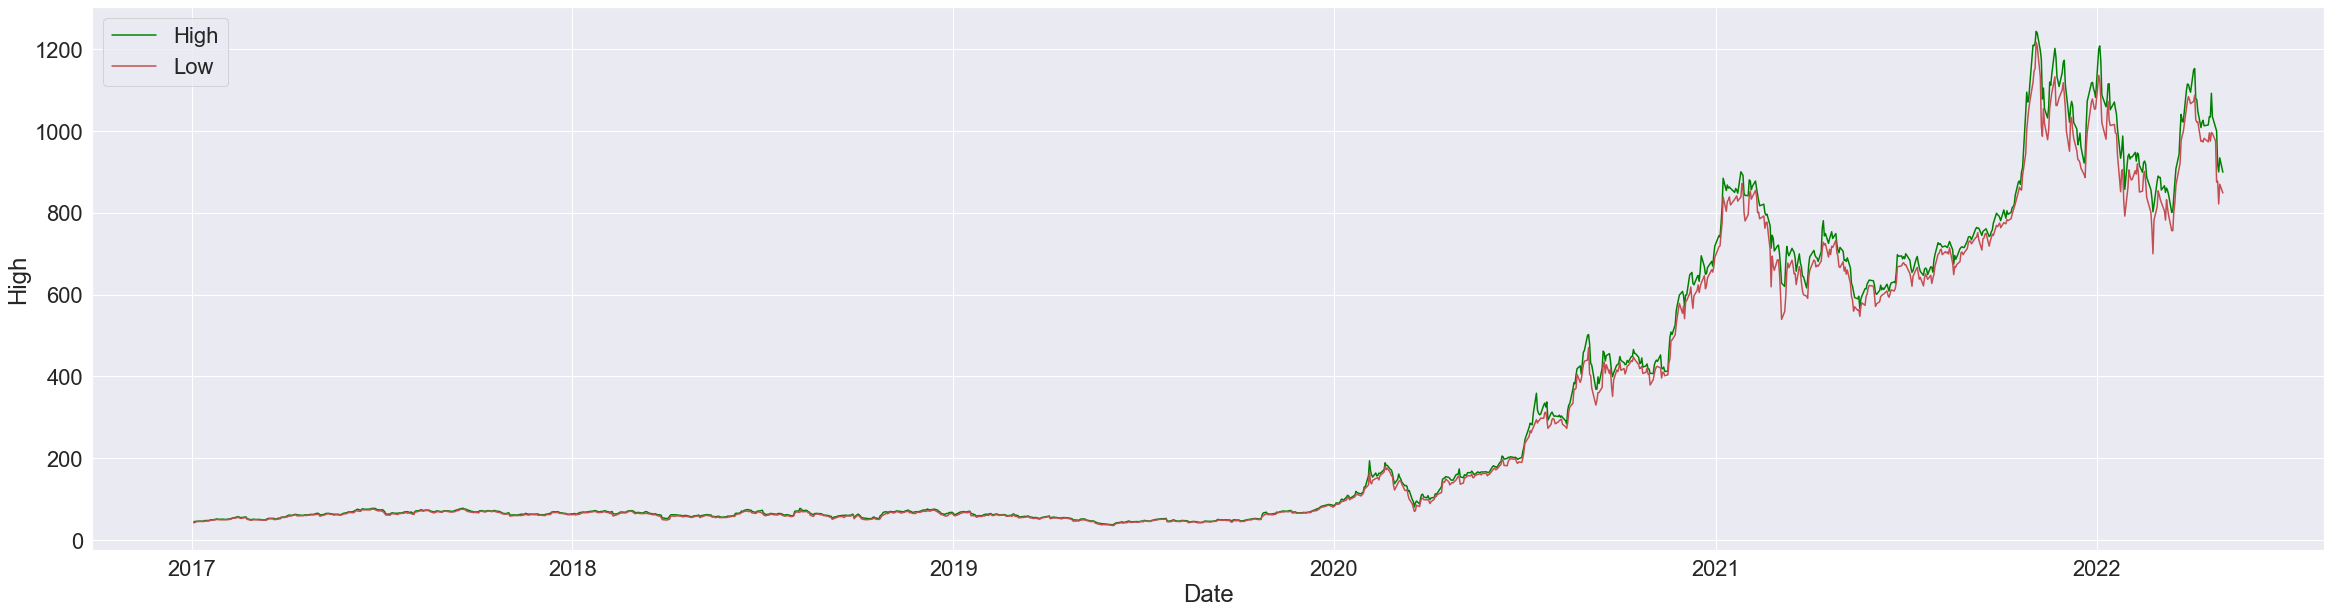

In [16]:

plt.figure(figsize=(40,10))
sns.set(font_scale = 2)

sns.lineplot(x='Date', y='High', data=df2,color = 'green',label = 'High')
sns.lineplot(x='Date', y='Low', data=df2,color = 'r',label = 'Low')


<AxesSubplot:xlabel='Date', ylabel='Open'>

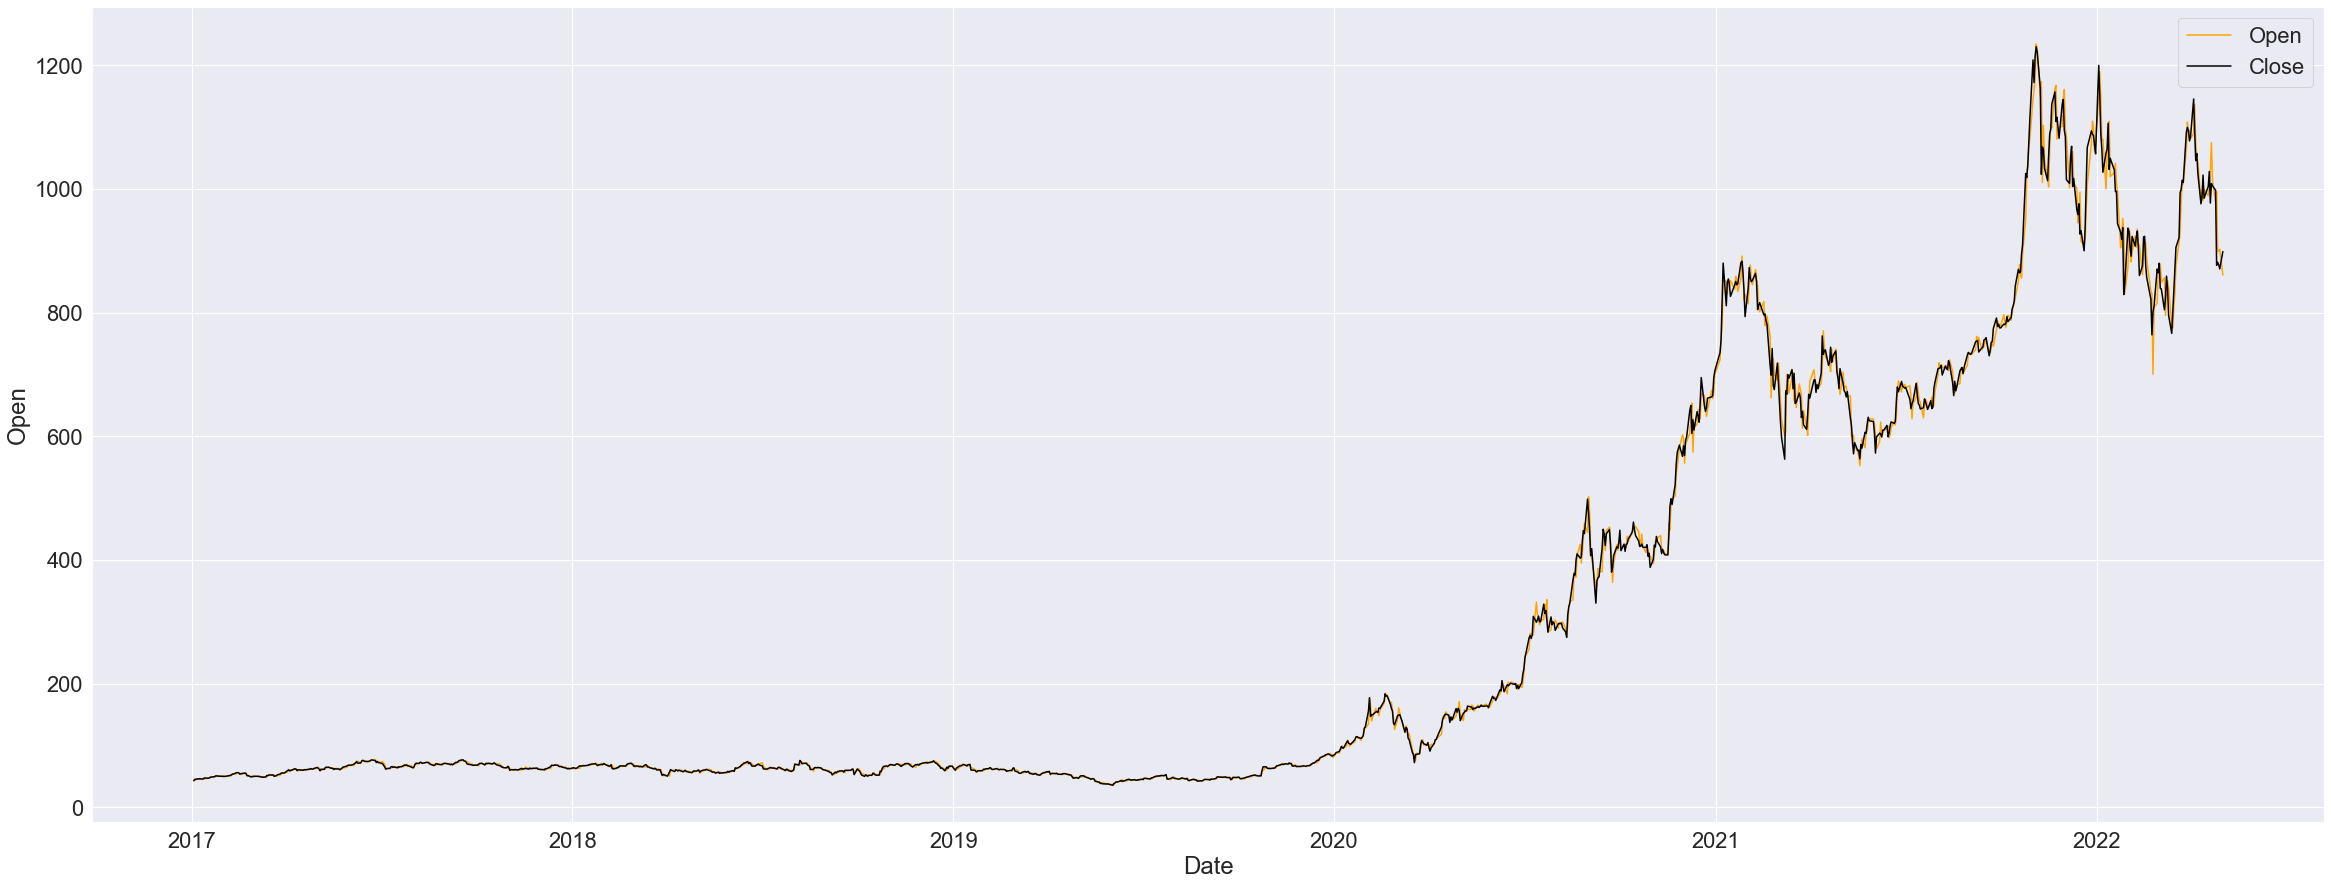

In [17]:
plt.figure(figsize=(40,15))
sns.set(font_scale = 2)

sns.lineplot(x='Date', y='Open', data=df2,color = 'orange',label = 'Open')
sns.lineplot(x='Date', y='Close', data=df2,color = 'black',label = 'Close')

In [18]:
a=df.groupby("Year")['High','Low','Open','Close'].mean().round(2)


<AxesSubplot:xlabel='Year'>

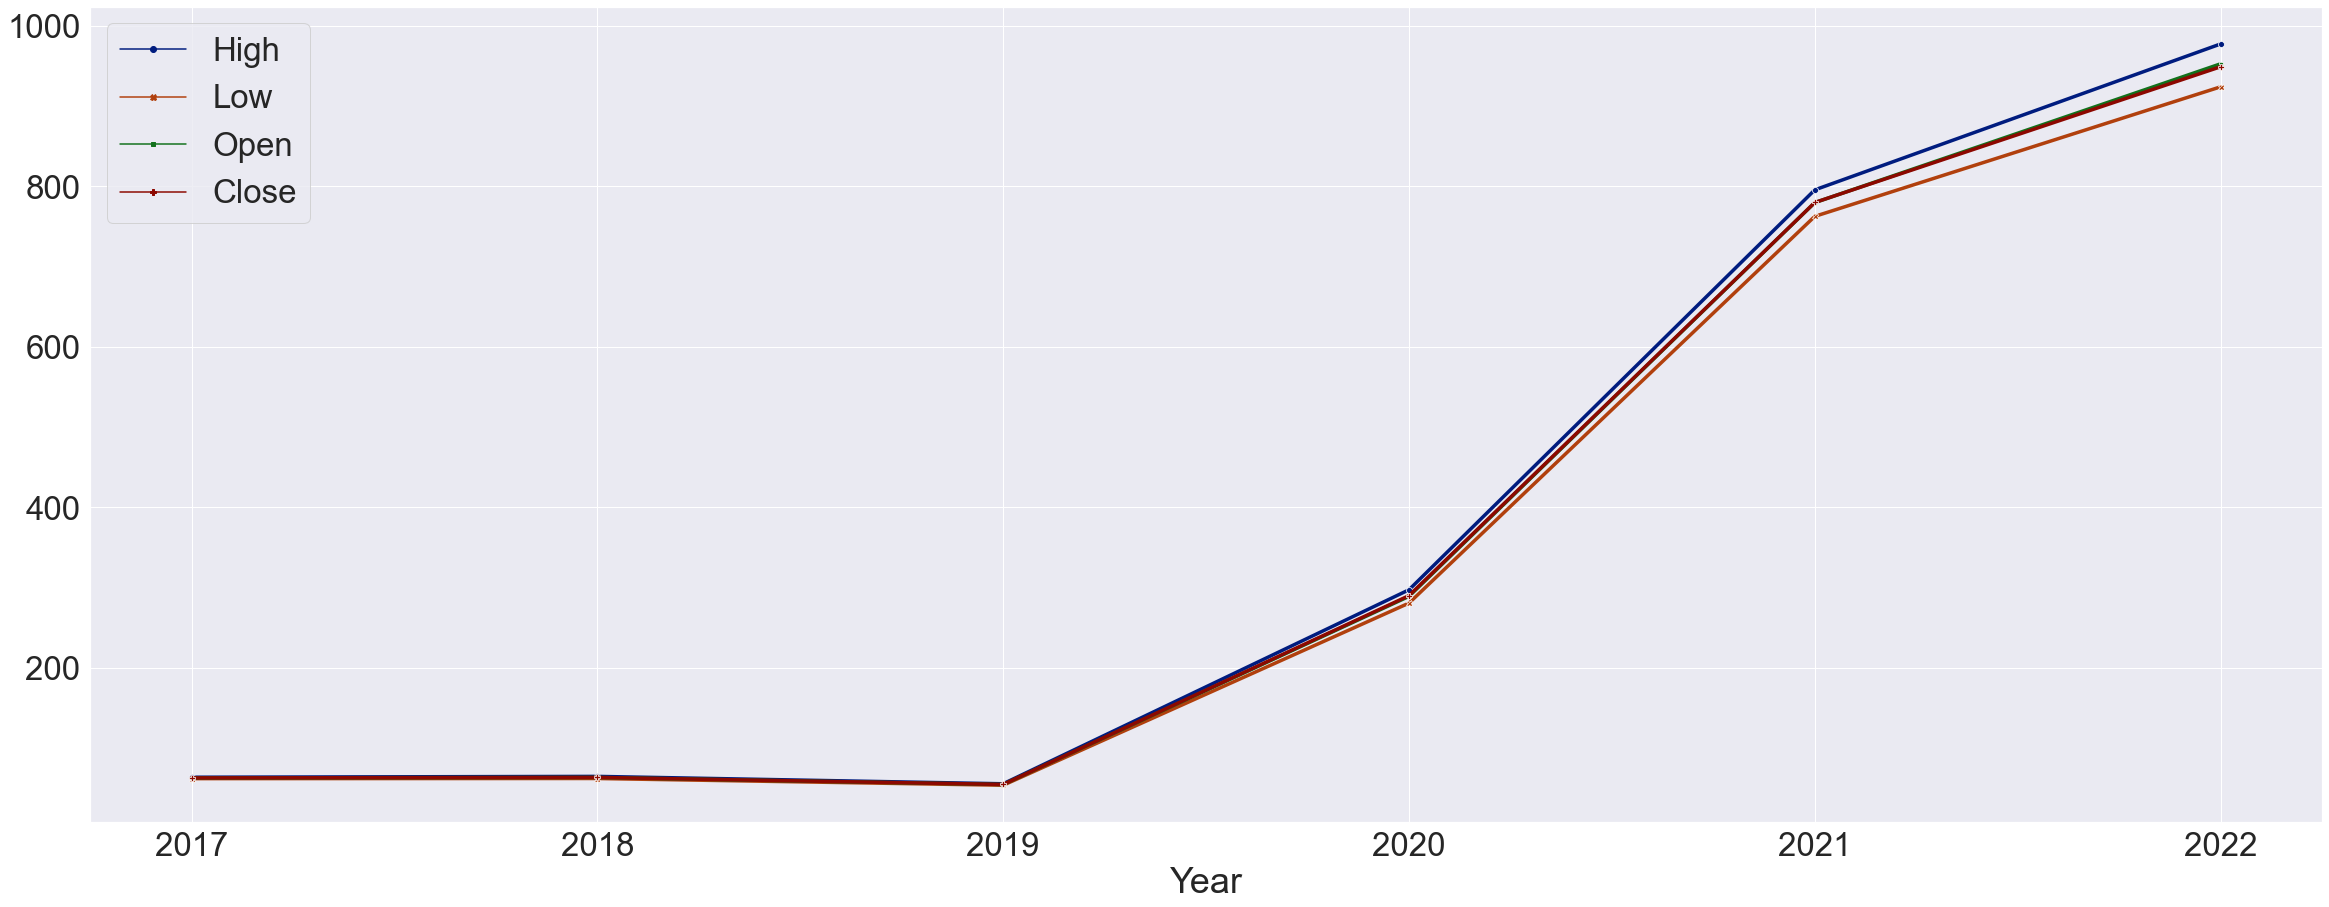

In [19]:
plt.figure(figsize=(40,15))
sns.set(font_scale = 3)
sns.lineplot(data=a,palette = "dark",sizes=(.25, 2.5),markers=True, dashes=False,legend="brief",linewidth = 3.5)

In [20]:
df2=df2.drop(["Date"],axis=1)
df2

,Open,High,Low,Close,Volume,Year,Month,Day
0,42.972000,44.066002,42.192001,43.397999,29616500,2017,1,3
1,42.950001,45.599998,42.862000,45.397999,56067500,2017,1,4
2,45.284000,45.495998,44.389999,45.349998,29558500,2017,1,5
3,45.386002,46.062000,45.090000,45.801998,27639500,2017,1,6
4,45.793999,46.383999,45.599998,46.256001,19897500,2017,1,9
...,...,...,...,...,...,...,...,...
1337,995.429993,1000.000000,875.000000,876.419983,45377900,2022,4,26
1338,898.580017,918.000000,877.359985,881.510010,25652100,2022,4,27
1339,899.979980,900.000000,821.700012,877.510010,41649500,2022,4,28
1340,902.250000,934.400024,870.000000,870.760010,29313400,2022,4,29


#train test split

In [62]:
x=df2.iloc[:,0:].drop(['Volume'], axis = 1)
y=df2.iloc[:,4:5]

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

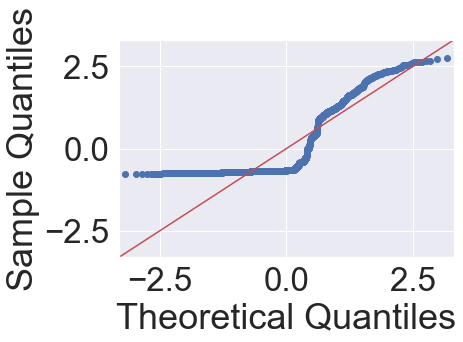

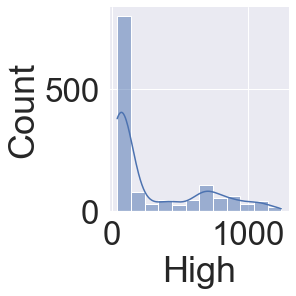

In [27]:
sm.qqplot(x.High,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(x.High, kde=True)

use 3 standard deviation from mean

In [29]:
x.High.max()

1243.48999

In [30]:
x.High.min()

37.335999

In [31]:
upper_limit=x.High.mean()+3*x.High.std()
upper_limit

1330.8350403313402

In [32]:
lower_limit=x.High.mean()-3*x.High.std()
lower_limit

-730.0824215593583

In [33]:
x[(x.High>upper_limit) | (x.High<lower_limit)]

,Open,High,Low,Close,Year,Month,Day


#feature scaling

Open column feature scaling

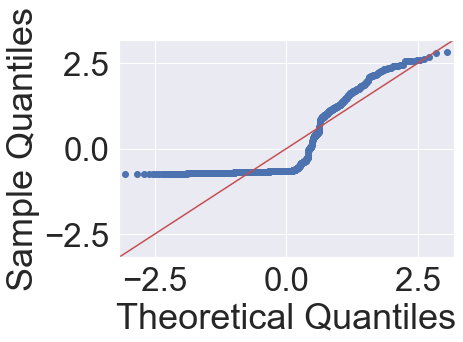

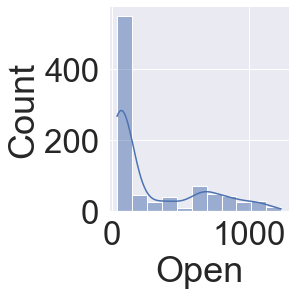

In [34]:
data=x_train.Open
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

QuantileTransformer

In [35]:
k=np.array(x_train.Open)
from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(k.reshape(-1, 1))

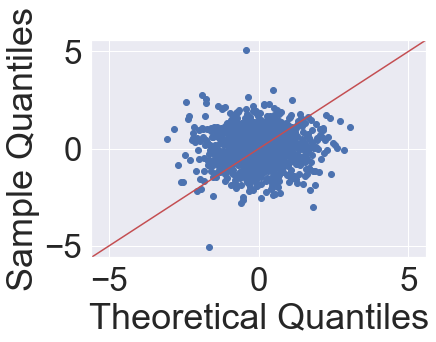

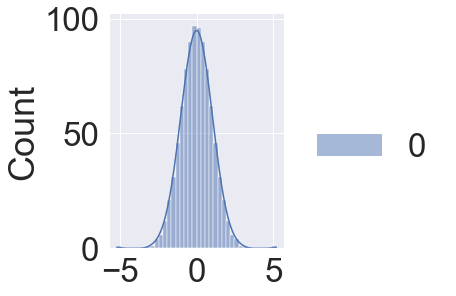

In [36]:
data=data_trans
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

box cox transformation

In [37]:
# k,parameters1=stats.boxcox(x_train.Open)

In [38]:
# data=k
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

Reciprocal Transform

**formula=1/number**

In [39]:
# data=1/x_train.Open
# x_train["Open"]=data

In [1]:
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

Square Root Transformation

*formula=data**0.5* 

In [41]:
# data=(x_train.Open)**0.5
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

Log Transformation

In [64]:
# #log1p transformation
# Log_Trans=np.log1p(x_train.Open)
# data=Log_Trans
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

Standardization

In [43]:
# def Standardization(feature):
#   return (feature - feature.mean())/feature.std()

In [44]:
# data=Standardization(x_train.Open)
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

Normalization

In [45]:
# def Normalization(feature):
#   return (feature - feature.min())/(feature.max() - feature.min())
# Normalization(x_train.Open)

In [46]:
# data=Normalization(x_train.Open)
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

Robust_Scaler

In [47]:
# def Robust_Scaler(feature):
#   return (feature - feature.quantile(0.25))/(feature - feature.quantile(0.75))
# Robust_Scaler(x_train.Open)

In [48]:
# data=Robust_Scaler(x_train.Open)
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

Exponentaial Tranformation
*formula=data**(1/1.2)*

In [49]:
# ex_trans=(x_train.Open)**(1/1.2)

In [50]:
# data=ex_trans
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

In [51]:
# x_train

feature scaling in High column

Reciprocal Transform

**formula=1/number**

In [53]:
# data=1/x_train.High
# # x_train["Open"]=data
# data_high=data

In [2]:
# data=data_high
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

In [65]:
# Standardization(data_high)

In [66]:
# data=Standardization(data_high)
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

Robust_Scaler

In [57]:
# def Robust_Scaler(feature):
#   return (feature - feature.quantile(0.25))/(feature - feature.quantile(0.75))
# Robust_Scaler(x_train.High)

In [58]:
# data=Robust_Scaler(x_train.High)
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

Volume column 

In [71]:
# y_test

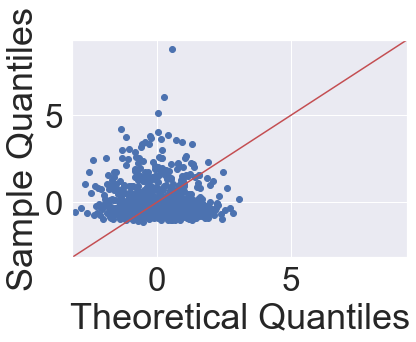

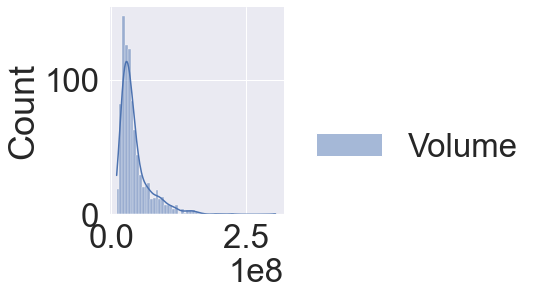

In [72]:
data=y_train
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

log transformation

In [80]:
# Log_Trans=np.log10(y_train.Volume)
# data=Log_Trans
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

boxcox transformation

In [74]:
k,parameters1=stats.boxcox(y_train.Volume)

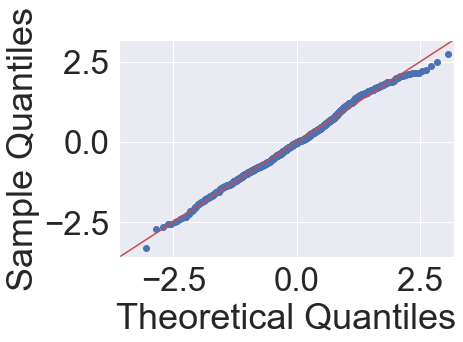

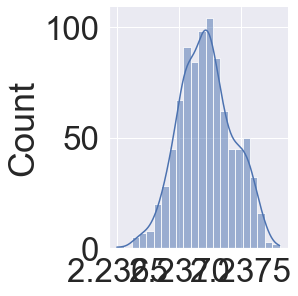

In [75]:
data=k
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

In [78]:
# k=np.array(y_train.Volume)
# from sklearn.preprocessing import QuantileTransformer
# quantile = QuantileTransformer(output_distribution='normal')
# data_trans = quantile.fit_transform(k.reshape(-1, 1))

In [79]:
# data=data_trans
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()

# sns.displot(data, kde=True)

In [ ]:
x_train

feature scaling in High column 

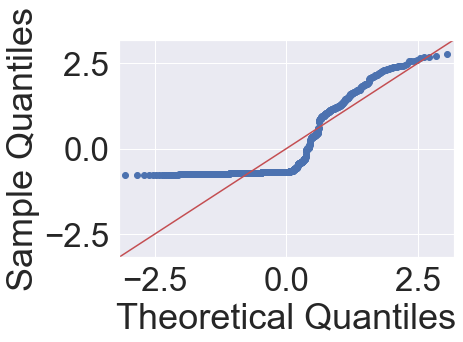

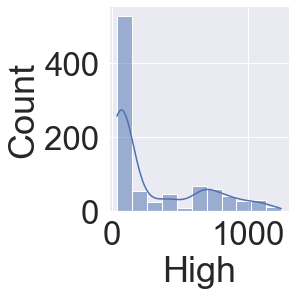

In [81]:
data=x_train.High
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

Quantile Transformer

In [82]:
k=np.array(x_train.High)
from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(k.reshape(-1, 1))
x_train["High"]=data_trans

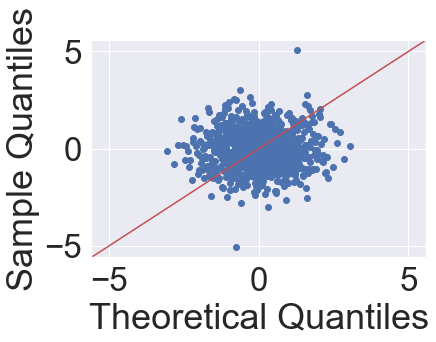

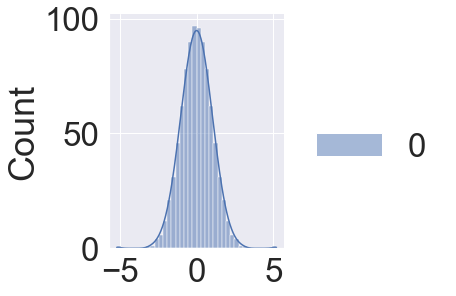

In [83]:
data=data_trans
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

feature sacaling in  Low column 

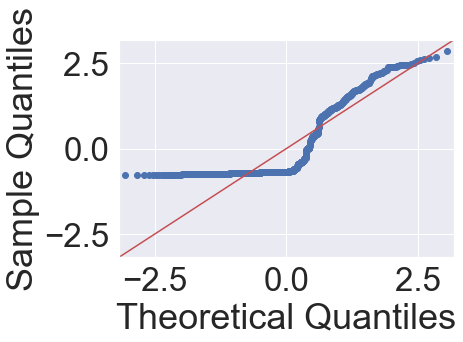

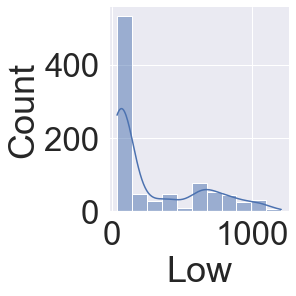

In [84]:
data=x_train.Low
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

Quantile Transformer

In [85]:
k=np.array(x_train.Low)
from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(k.reshape(-1, 1))
x_train["Low"]=data_trans

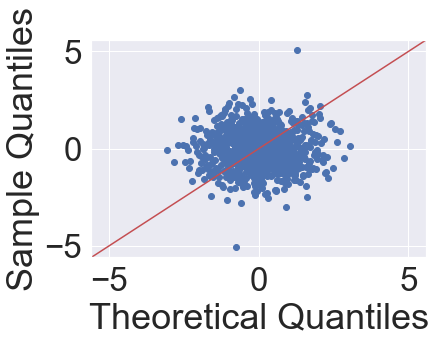

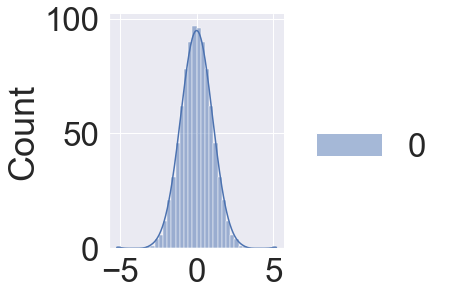

In [86]:
data=data_trans
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

feature scaling in  Close column

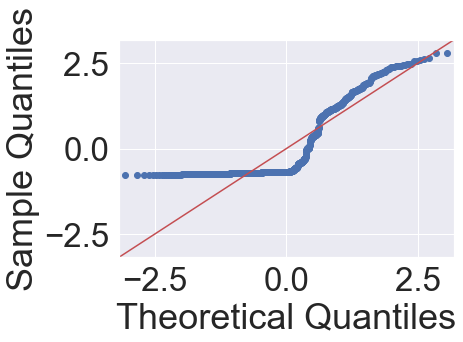

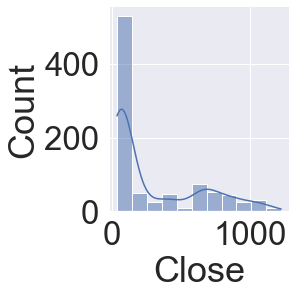

In [87]:
data=x_train.Close
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

Quantile Transformer

In [88]:
k=np.array(x_train.Close)
from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(k.reshape(-1, 1))
x_train["Close"]=data_trans

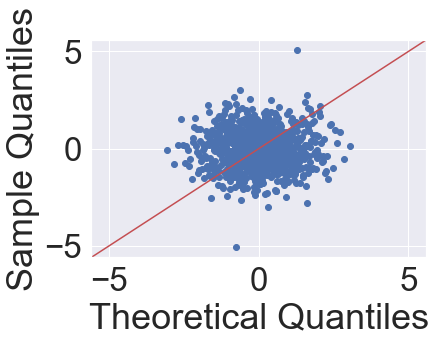

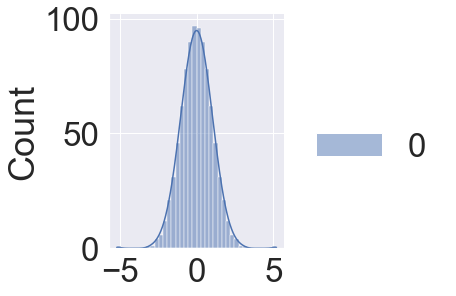

In [89]:
data=data_trans
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

### Test data scaling

'Open' feature

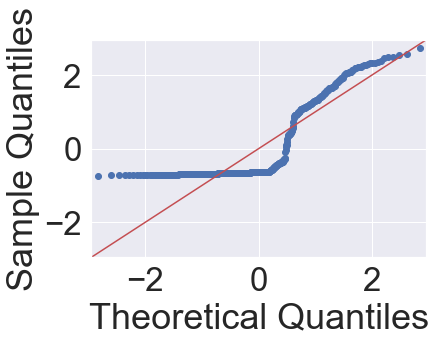

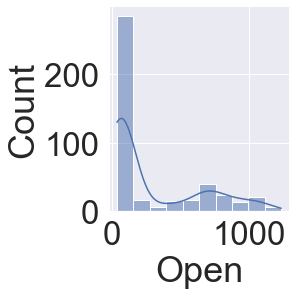

In [90]:
data=x_test.Open
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

'High' feature

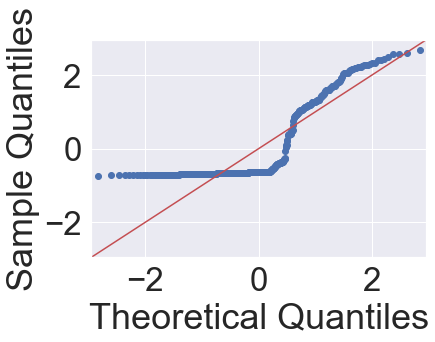

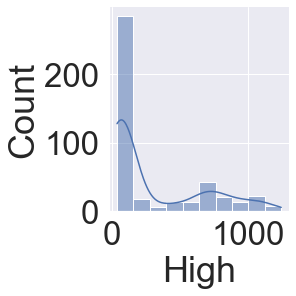

In [91]:
data=x_test.High
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

'Low' feature

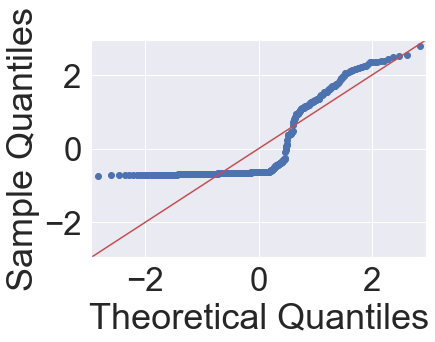

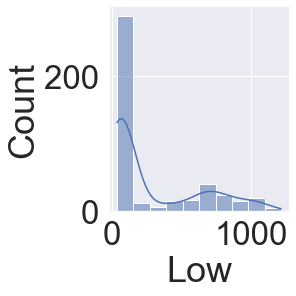

In [93]:
data=x_test.Low
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)
plt.show()

'Close' feature

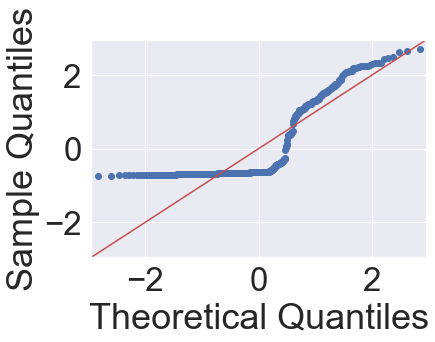

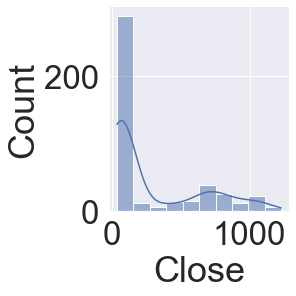

In [94]:
data=x_test.Close
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)
plt.show()

'Volume(y_test)' feature

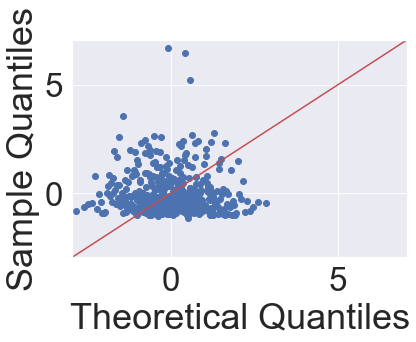

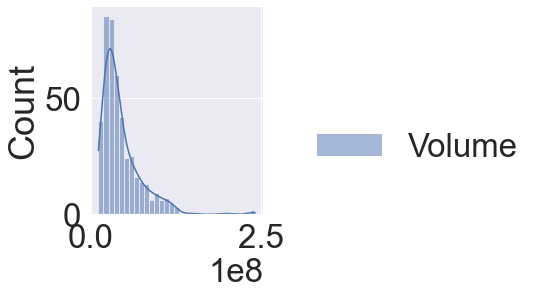

In [95]:
data=y_test
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)
plt.show()

In [98]:
k=np.array(x_test.Open)
from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(k.reshape(-1, 1))
x_test["Open"]=data_trans

In [99]:
k=np.array(x_test.High)
from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(k.reshape(-1, 1))
x_test["High"]=data_trans

In [100]:
k=np.array(x_test.Low)
from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(k.reshape(-1, 1))
x_test["Low"]=data_trans

In [101]:
k=np.array(x_test.Close)
from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(k.reshape(-1, 1))
x_test["Close"]=data_trans

In [102]:
k=np.array(y_test)
from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(k.reshape(-1, 1))
y_test=data_trans

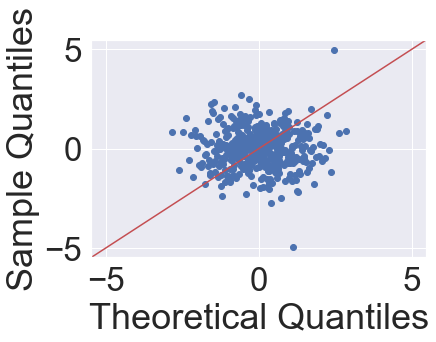

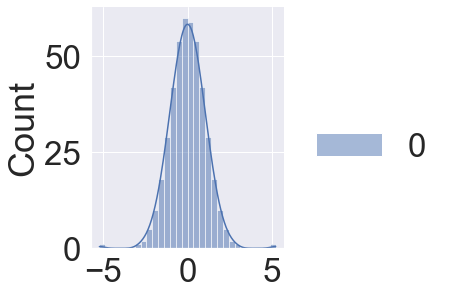

In [97]:
data=data_trans
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)
plt.show()

In [106]:
ytest = np.array(y_test)
ytrain = np.array(y_train)
xtest = np.array(x_test)
xtrain = np.array(x_train)

### Multivariate Lenear regression algo.

In [116]:
class Multivariate_Lr:
    def __init__(self,n):
        #initialising weights and bias
        self.w = np.random.randn(1,n)
        self.b = 0
    def pred(self,X):
        y_pred = np.matmul(X, self.w.T)+self.b #(m,n)x(n,1)=(m,1)
        return y_pred
    # def model_accuracy(self,y_pred,y):
    #     error=np.sum((y_pred-y)2)
    #     accuracy=np.sqrt(error / y.shape[0])
    #     return accuracy
    def Loss(self,y_pred,y):
        m = y.shape[0]
        loss = ((y_pred - y)*2)/(2*m)
        return np.sum(loss)
    def grad(self,X,y):
        m = y.shape[0]
        y_hat = self.pred(X)
        dw = np.matmul((y_hat - y).T , X)(1/m) #(1,n)
        db = np.sum(y_hat - y)(1/m) #scalar value
        return dw, db
    def fit(self,X,y,epochs,lr):
        self.w_hist = self.w
        self.b_hist = [self.b]
        Loss = []
        #Storing the initial loss before starting the training
        y_pred = self.pred(X)
        initial_loss = self.Loss(y_pred,y)
        Loss.append(initial_loss,)
        for i in range(1,epochs+1):
            dw,db = self.grad(X,y)
            self.w = self.w - lrdw
            self.b = self.b - lr*db
            y_pred = self.pred(X)
            loss = self.Loss(y_pred, y)
            Loss.append(loss)
            #Storing the updated values of w,b
            self.w_hist = np.append(self.w_hist, self.w, axis = 0)
            self.b_hist.append(self.b)
            #print('Epoch: ',i,'Training Loss: ',loss)
        print('Final Loss: ',loss)
        plt.plot(Loss,'-o')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()


In [117]:
obj = Multivariate_Lr(xtrain.shape[1])

In [121]:
obj.fit(xtrain,ytrain,200, lr = 0.1)

TypeError: 'numpy.ndarray' object is not callable